In [83]:
%matplotlib inline
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [84]:
# Load historical stock data (replace 'stock_data.csv' with your data sour
url = 'TSLA.csv'
df = pd.read_csv(url)

# Display the first few rows of the dataset
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [85]:
df["Date"] = pd.to_datetime(df["Date"], format='%Y-%m-%d')

<Axes: xlabel='Date', ylabel='Close'>

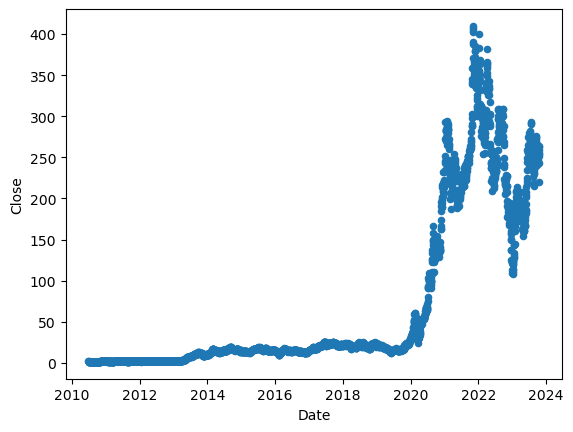

In [86]:
df.plot.scatter(x = 'Date', y = 'Close')

In [87]:
df['Date_conv'] = df['Date'].map(datetime.toordinal)

In [88]:
old = (df['Date'] < '2020-01-01')
df.drop(df[old == True].index, inplace=True)

<Axes: xlabel='Date', ylabel='Close'>

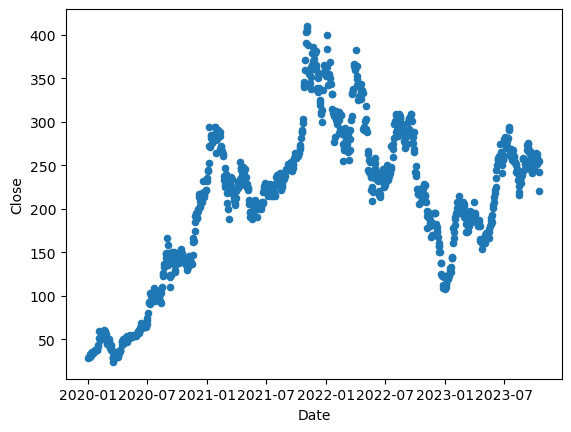

In [89]:
df.plot.scatter(x = 'Date', y = 'Close')

In [90]:
def predictPrice(date):
    date = datetime.strptime(date, "%Y-%m-%d")
    date_ordinal = date.toordinal()
    date_index = df.Date[df.Date == date].index.tolist()[0]
    
    prediction = lr.predict([[date_ordinal]])[0]
    real = df.Close[date_index]
    difference = prediction / real * 100
    print(f"Predicted price on {date} is: ${prediction:.2f}")
    print(f"Real value on {date} is: ${real:.2f}")
    print(f"Prediction is {difference:.2f}% of real value")
    print("MSE = " + str(mean_squared_error(y_train, y_pred)))

In [96]:
predictPrice("2023-09-25")

Predicted price on 2023-09-25 00:00:00 is: $282.92
Real value on 2023-09-25 00:00:00 is: $246.99
Prediction is 114.55% of real value
MSE = 5466.409897574386
